# Project 2

## Quick Setup Instructions For Reader

In the verification section, I save data to files to save time repeatedly doing API calls or repeatedly doing simulation runs. Attached to my submission for this assignment are a whole bunch of those files.  
The file format is: `fileName = realPosition/calculatedPosition + startingMonth + startingDay + startingYear + numBodies + numMonths`, all concatenated together. The calculatedPosition also has deltaT at the end. This way whenever you change the variables you get a new file for it, or load in the file if it already exists.

One slight quirk is the numBodies term, which doesn't actually check which bodies their are. I'm just assuming that if their are 11 bodies then thats the sun + every planet + pluto + earths moon. And if numBodies is 5 then thats the sun + inner planets, and then something in between that I haven't really cared to deal with cause it's not a big deal.

## Imports

In [1]:
from vpython import *
import numpy as np
import matplotlib.pyplot as pyplt
import matplotlib as plt
import json
import base64
import requests
import timeit
import os
G = 6.67e-11
scene = canvas()
sphere()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Newton's Cannonball
For these simulations we will use the real mass and radius of the earth in SI units, and we will use a cannonball that weights 10kg, and it's radius will be whatever value makes it visible in the simulation, since it's radius is not relevant to any of the calculations.

### Orbital Velocity

#### Setup
The orbital velocity of an object depends on the radius of its orbit, and the mass of the object its orbiting.  
The formula for calculating this is $\sqrt{\frac{GM}{R}}$ My source: ([Source](https://www.geeksforgeeks.org/orbital-velocity-formula/))  
So for example, the earth orbits the moon at around 3683 kph which is 1023 m/s. The distance between the moons center and the earths center is 384,400,400 meters, and the mass of the earth 5.9722e+24kg. So doing that calculation below we get:

In [2]:
sqrt(G*5.9722e+24/(384400000))

1017.9780156637028

Which is around the correct value, the error is because of the moons orbit not being perfectly circular so at different points in the orbit its speed and radius change a bit.
So for our newton's cannonball orbiting simulation, we are going to launch the cannonball from the height of Mt. Everest, which is 8849 meters. It's orbiting radius will be the radius of the earth (6.38 million meters) + the height of everest.  
So we should see it orbit with an initial velocity of around:

In [3]:
sqrt(G*5.9722e+24/(6.38e+6+8849))

7896.211577829684

7896.2 meters per second!

Here we run the simulation 3 times, once with initial velocity of 8500, once with initial velocity of 7500, and then finally with the calculated value of 7896 (all m/s).
The camera positioning is off so make sure to just CTRL+Drag to rotate so that you can see the orbit properly.  
Notice that in the first run the ball orbits but isn't spherical, in the second run the ball dips inside the earth, and then on the run with the calculated value the ball orbits perfectly in a circle just above the earth's surface.  
(Note that since the height of Everest is so small compared to the Earth's radius, it will look like the ball is sitting right on the earth, when in reality is around 8849 meters above it)

#### Code

In [4]:
scene = canvas()

#setup notes for later
#IV=11150 + deltaT=1 + loopCount=10000 returns but IV=11200 + deltaT=1 + loopCount=10000 doesnt
#IV=11150 + deltaT=10 + loopCount=1000 returns and collides but IV=11200 + deltaT=10 + loopCount=1000 returns but doesnt collide
# both these setups run for 100k seconds or ~= 1.15 days in simulation time

initialElevation = 8849
initialVelocity = vector(8500, 0, 0)

earth = sphere(pos=vector(0,0,0), radius=6.38e+6, color=color.green)
earth.velocity = vector(0,0,0)
earth.acceleration = vector(0,0,0)
earth.Radius=6.38e+6
earth.Mass = 5.9722e+24

ball = sphere(pos=vector(0,earth.radius+initialElevation,0), radius=500000, color=color.red, make_trail=True)

ball.velocity = initialVelocity
ball.acceleration = vector(0, 0, 0)
ball.Mass = 10

deltaT = 1
loopCount = 10
realT = 0
rateParam = 60.0
timeLimit = 12
print("Running with initial velocity of 8500 meters per second")
while realT < timeLimit:
    
    # run updates multiple times per frame to speed up while keeping deltaT low
    for i in range(loopCount):
        # Gm/|r|^2 * unit vector for r
        ball.acceleration = (G*earth.Mass/(mag(earth.pos-ball.pos)**2)) * ((earth.pos-ball.pos)/mag(earth.pos-ball.pos))
        ball.velocity = ball.velocity + ball.acceleration*deltaT
        nextBallPos = ball.pos + ball.velocity*deltaT
        
        earth.acceleration = (G*ball.Mass/(mag(ball.pos-earth.pos)**2)) * ((ball.pos-earth.pos)/mag(ball.pos-earth.pos))
        earth.velocity = earth.velocity + earth.acceleration*deltaT
        earth.pos = earth.pos + earth.velocity*deltaT
        ball.pos = nextBallPos
        
    realT += 1.0 / rateParam
    rate(rateParam)
    
# reset it up for next run
ball.clear_trail()
ball.pos=vector(0,earth.radius+initialElevation,0)
initialVelocity = vector(7500, 0, 0)
ball.velocity = initialVelocity
ball.acceleration = vector(0, 0, 0)
earth.pos = vector(0,0,0)
earth.velocity = vector(0,0,0)
earth.acceleration = vector(0,0,0)
realT = 0
print("Running with initial velocity of 7500 meters per second")
while realT < timeLimit:
    
    # run updates multiple times per frame to speed up while keeping deltaT low
    for i in range(loopCount):
        # Gm/|r|^2 * unit vector for r
        ball.acceleration = (G*earth.Mass/(mag(earth.pos-ball.pos)**2)) * ((earth.pos-ball.pos)/mag(earth.pos-ball.pos))
        ball.velocity = ball.velocity + ball.acceleration*deltaT
        nextBallPos = ball.pos + ball.velocity*deltaT
        
        earth.acceleration = (G*ball.Mass/(mag(ball.pos-earth.pos)**2)) * ((ball.pos-earth.pos)/mag(ball.pos-earth.pos))
        earth.velocity = earth.velocity + earth.acceleration*deltaT
        earth.pos = earth.pos + earth.velocity*deltaT
        ball.pos = nextBallPos
        
    realT += 1.0 / rateParam
    rate(rateParam)
    
# reset it up for next run
ball.clear_trail()
ball.pos=vector(0,earth.radius+initialElevation,0)
initialVelocity = vector(7896, 0, 0)
ball.velocity = initialVelocity
ball.acceleration = vector(0, 0, 0)
earth.pos = vector(0,0,0)
earth.velocity = vector(0,0,0)
earth.acceleration = vector(0,0,0)
realT = 0
print("Running with the calculated initial velocity of 7896 meters per second")
while realT < timeLimit:
    
    # run updates multiple times per frame to speed up while keeping deltaT low
    for i in range(loopCount):
        # Gm/|r|^2 * unit vector for r
        ball.acceleration = (G*earth.Mass/(mag(earth.pos-ball.pos)**2)) * ((earth.pos-ball.pos)/mag(earth.pos-ball.pos))
        ball.velocity = ball.velocity + ball.acceleration*deltaT
        nextBallPos = ball.pos + ball.velocity*deltaT
        
        earth.acceleration = (G*ball.Mass/(mag(ball.pos-earth.pos)**2)) * ((ball.pos-earth.pos)/mag(ball.pos-earth.pos))
        earth.velocity = earth.velocity + earth.acceleration*deltaT
        earth.pos = earth.pos + earth.velocity*deltaT
        ball.pos = nextBallPos
        
    realT += 1.0 / rateParam
    rate(rateParam)

<IPython.core.display.Javascript object>

Running with initial velocity of 8500 meters per second
Running with initial velocity of 7500 meters per second
Running with the calculated initial velocity of 7896 meters per second


### Escape Velocity
#### Setup
The escape velocity of the earth when launching an object from sea level (and disregarding air resistance) is around 11.2 km/s or 11200 meters per second. [Source](https://www.britannica.com/science/escape-velocity)
It's hard to tell when an object "escapes" because in theory, given infinite time, you can never truly escape gravity because although the gravitational force decreases with the square of the distance, it never truly goes to 0.  
We can say that if the ball's upwards velocity becomes negative, then it is starting to return to earth and did not escape.  
So for the purposes of this simulation, we will assume that the ball escapes if after 600,000 seconds (around 1 week) it's velocity is still positive. We will also check for collisions to see if the ball did fall back to earth in that time.
Note that the simulation time is 600k seconds because we have a dt of 1 second, and it gets updated 1000 times per animation frame, there are set to be 60 animation frames per second (it lags a lot so really it's a lot slower than that, but realT gets incremented by 1/60 each animation frame), and we run it for 10 seconds (realT<10)

First we will run the simulation with an initial velocity of 8000 meters per second, so you can see it relatively quickly fall back to earth. Then we will run it extremely sped up, at initial velocities of 11100 m/s (11.1 km/s) and 11200 m/s (11.2 m/s), the ladder of which is the textbook escape velocity. You will see that according to our definition of escaping in the 1.15 day time frame, the ball does not escape at 11.1 km/s (it won't collide with earth in the time frame but it will start returning) but  escapes at 11.2 km/s, meaning our simulation is very accurate.  
Note that these last 2 simulations do take some time to run with the calculation loop being set to run 10,000 times for each 1 frame of animation. And look at the printed text output to see the results, the visualization will become basically useless since its so sped up and so zoomed out

#### Code

In [5]:
scene = canvas()

initialElevation = 0
initialVelocity = vector(0, 8000, 0)

earth = sphere(pos=vector(0,0,0), radius=6.38e+6, color=color.green)
earth.velocity = vector(0,0,0)
earth.acceleration = vector(0,0,0)
earth.Radius=6.38e+6
earth.Mass = 5.9722e+24

ball = sphere(pos=vector(0,earth.radius+initialElevation,0), radius=1000000, color=color.red)

ball.velocity = initialVelocity
ball.acceleration = vector(0, 0, 0)
ball.Mass = 1

deltaT = 1
loopCount = 10
timeLimit = 10
t = 0
realT = 0
rateParam = 60.0
frameCount = 0
collision = False
returning = False
print("Running with initial velocity of 8000 m/s")
while realT < timeLimit:
    
    # run updates multiple times per frame to speed up while keeping deltaT low
    for i in range(loopCount):
        # Gm/|r|^2 * unit vector for r
        ball.acceleration = (G*earth.Mass/(mag(earth.pos-ball.pos)**2)) * ((earth.pos-ball.pos)/mag(earth.pos-ball.pos))
        ball.velocity = ball.velocity + ball.acceleration*deltaT
        nextBallPos = ball.pos + ball.velocity*deltaT
        

        earth.acceleration = (G*ball.Mass/(mag(ball.pos-earth.pos)**2)) * ((ball.pos-earth.pos)/mag(ball.pos-earth.pos))
        earth.velocity = earth.velocity + earth.acceleration*deltaT
        earth.pos = earth.pos + earth.velocity*deltaT
        ball.pos = nextBallPos
        
        # if velocity becomes negative that means it will now be returning to earth
        if ball.velocity.y < 0 and not returning:
            print("RETURNING TO EARTH")
            returning = True
        
        # collision
        if mag(earth.pos-ball.pos)<earth.Radius:
            
            collision = True
            break
            
        t += deltaT
    
    # if frameCount % 30 == 0:
    #     print("Ball yPos: " + str(ball.pos.y) + " | velocity: " + str(ball.velocity.y) + " | acceleration: " + str(ball.acceleration.y))
    
    if collision:
        break
    
    realT += 1.0 / rateParam
    frameCount+=1
    rate(rateParam)
print("COLLISION" if collision else "No Collision")

# reset it up for next run
ball.pos=vector(0,earth.radius+initialElevation,0)
initialVelocity = vector(0, 11100, 0)
ball.velocity = initialVelocity
ball.acceleration = vector(0, 0, 0)
earth.pos = vector(0,0,0)
earth.velocity = vector(0,0,0)
earth.acceleration = vector(0,0,0)
realT = 0
loopCount = 1000
collision=False
returning=False
print("")
print("Running with initial velocity of 11100 meters per second")
while realT < timeLimit:
    
    # run updates multiple times per frame to speed up while keeping deltaT low
    for i in range(loopCount):
        # Gm/|r|^2 * unit vector for r
        ball.acceleration = (G*earth.Mass/(mag(earth.pos-ball.pos)**2)) * ((earth.pos-ball.pos)/mag(earth.pos-ball.pos))
        ball.velocity = ball.velocity + ball.acceleration*deltaT
        nextBallPos = ball.pos + ball.velocity*deltaT
        

        earth.acceleration = (G*ball.Mass/(mag(ball.pos-earth.pos)**2)) * ((ball.pos-earth.pos)/mag(ball.pos-earth.pos))
        earth.velocity = earth.velocity + earth.acceleration*deltaT
        earth.pos = earth.pos + earth.velocity*deltaT
        ball.pos = nextBallPos
        
        # if velocity becomes negative that means it will now be returning to earth
        if ball.velocity.y < 0 and not returning:
            print("RETURNING TO EARTH")
            returning = True
        
        # collision
        if mag(earth.pos-ball.pos)<earth.Radius:
            
            collision = True
            break
            
        t += deltaT
    
    if frameCount % 50 == 0:
        print("Ball yPos: " + str(ball.pos.y) + " | velocity: " + str(ball.velocity.y) + " | acceleration: " + str(ball.acceleration.y))
    
    if collision:
        break
    
    realT += 1.0 / rateParam
    frameCount+=1
    rate(rateParam)
print("COLLISION" if collision else "No Collision")

# reset it up for next run
ball.pos=vector(0,earth.radius+initialElevation,0)
initialVelocity = vector(0, 11200, 0)
ball.velocity = initialVelocity
ball.acceleration = vector(0, 0, 0)
earth.pos = vector(0,0,0)
earth.velocity = vector(0,0,0)
earth.acceleration = vector(0,0,0)
realT = 0
loopCount = 1000
collision=False
returning=False
print("")
print("Running with initial velocity of 11200 meters per second")
while realT < timeLimit:
    
    # run updates multiple times per frame to speed up while keeping deltaT low
    for i in range(loopCount):
        # Gm/|r|^2 * unit vector for r
        ball.acceleration = (G*earth.Mass/(mag(earth.pos-ball.pos)**2)) * ((earth.pos-ball.pos)/mag(earth.pos-ball.pos))
        ball.velocity = ball.velocity + ball.acceleration*deltaT
        nextBallPos = ball.pos + ball.velocity*deltaT
        

        earth.acceleration = (G*ball.Mass/(mag(ball.pos-earth.pos)**2)) * ((ball.pos-earth.pos)/mag(ball.pos-earth.pos))
        earth.velocity = earth.velocity + earth.acceleration*deltaT
        earth.pos = earth.pos + earth.velocity*deltaT
        ball.pos = nextBallPos
        
        # if velocity becomes negative that means it will now be returning to earth
        if ball.velocity.y < 0 and not returning:
            print("RETURNING TO EARTH")
            returning = True
        
        # collision
        if mag(earth.pos-ball.pos)<earth.Radius:
            
            collision = True
            break
            
        t += deltaT
    
    if frameCount % 50 == 0:
        print("Ball yPos: " + str(ball.pos.y) + " | velocity: " + str(ball.velocity.y) + " | acceleration: " + str(ball.acceleration.y))
    
    if collision:
        break
    
    realT += 1.0 / rateParam
    frameCount+=1
    rate(rateParam)
print("COLLISION" if collision else "No Collision")

<IPython.core.display.Javascript object>

Running with initial velocity of 8000 m/s
RETURNING TO EARTH
COLLISION

Running with initial velocity of 11100 meters per second
Ball yPos: 78510252.66943346 | velocity: 2894.1060838797393 | acceleration: -0.06463078727912144
Ball yPos: 182403748.6588826 | velocity: 1611.151113482668 | acceleration: -0.011972926883208555
Ball yPos: 251133305.93813655 | velocity: 1183.4037999174077 | acceleration: -0.0063161966439322145
Ball yPos: 303411174.43946546 | velocity: 924.0334899897025 | acceleration: -0.004327127373455163
Ball yPos: 344673301.6616789 | velocity: 734.5027163180473 | acceleration: -0.003353101804704885
Ball yPos: 377469107.8462446 | velocity: 581.9515802495112 | acceleration: -0.002795752274378589
Ball yPos: 403232540.63722825 | velocity: 451.459044499911 | acceleration: -0.0024499092938345553
Ball yPos: 422845836.61365265 | velocity: 334.9195449758047 | acceleration: -0.0022279054063868474
Ball yPos: 436872652.3796623 | velocity: 227.32536939755389 | acceleration: -0.002087136

## Solar System

### Simple Sun and Earth Example
This example just tests having the earth orbiting the sun, and tests scaling radius values for visualization purposes.

In [8]:
scene = canvas()

initialVelocity = vector(0, -30000, 0)
G = 6.67e-11

sun = sphere(pos=vector(0,0,0), radius=2e+10, color=color.yellow)
sun.Radius=0.6e9
sun.mass = 2e+30
sun.velocity = vector(0,0,0)
sun.acceleration = vector(0, 0, 0)

earth = sphere(pos=vector(149.6e+9,0,0), radius=6.38e+9, color=color.green)
earth.Radius=6.38e+6
earth.mass = 5.9722e+24
earth.velocity = initialVelocity
earth.acceleration = vector(0, 0, 0)


deltaT = 2400
t = 0
realT = 0
rateParam = 100.0
while realT < 5:
    for i in range(50):
        # Gm/|r|^2 * unit vector for r
        earth.acceleration = (G*sun.mass/(mag(earth.pos-sun.pos)**2)) * (-1*earth.pos/mag(earth.pos-sun.pos))
        earth.velocity = earth.velocity + earth.acceleration*deltaT
        earth.pos = earth.pos + earth.velocity*deltaT
        
        sun.acceleration = (G*earth.mass/(mag(sun.pos-earth.pos)**2)) * (-1*earth.pos/mag(sun.pos-earth.pos))
        sun.velocity = sun.velocity + sun.acceleration*deltaT
        sun.pos = sun.pos + sun.velocity*deltaT
        
        t+=deltaT
    
    realT += 1.0 / rateParam
    rate(rateParam)

<IPython.core.display.Javascript object>

To add the rest of the planets and moons, we should refactor so that we have a separate data structure to store the real position, velocity, and acceleration data, as well as masses and radii. We will use numpy for this since it is very efficient.  
To avoid manually copying and pasting values from the NASA Database, we will use their API to scrape their database automatically so we can get data for many different planets and moons with ease.

### NASA API utility functions
The nasaToFloat function converts between the way they format the information in the ephemeris data, into just a floating point number in meters.  
The getEphemeris function does an API call for a specific body specified by its body ID (sun=10, earth=399, etc) and by default returns its ephemeris data, as well as its mass and radius. But, with the different parameters you can also get to instead print out the list of every major body, or return a list containing the body ID's for every major body so you can then loop over that and get data for each body.

In [2]:
# Define API URL and SPK filename:
url = 'https://ssd.jpl.nasa.gov/api/horizons.api'
spk_filename = 'spk_file.bsp'

def nasaToFloat(string):
    string = string[1:] if string[0]==' ' else string
    base = string[:string.find("E")]
    exp = string[string.find("E")+2:]
    signExp = 1 if string[string.find("E")+1]=="+" else -1
    return float(base)*10**(float(exp)*signExp+3) # add 3 to convert from kilometers to meters

# returns dictionary of important data
def getEphemeris(body, start_time, end_time, printMajorBodies=False, getMajorIDs=False):
    # Build the appropriate URL for this API request:
    # IMPORTANT: You must encode the "=" as "%3D" and the ";" as "%3B" in the
    #            Horizons COMMAND parameter specification.
    
    body = 'MB' if printMajorBodies or getMajorIDs else body
    url = 'https://ssd.jpl.nasa.gov/api/horizons.api'
    url += "?format=json&EPHEM_TYPE=VECTORS&VEC_TABLE=2&MAKE_EPHEM=YES&OBJ_DATA=YES&CENTER=500%4010"
    url += "&COMMAND='{}'&START_TIME='{}'&STOP_TIME='{}'&STEP_SIZE=1d".format(body, start_time, end_time)

    # Submit the API request and decode the JSON-response:
    response = requests.get(url)
    try:
      data = json.loads(response.text)
    except ValueError:
      print("Unable to decode JSON results")

    # If the request was valid...
    if (response.status_code == 200):
      if "result" in data:
        result = data["result"]
        # print(result)
        if printMajorBodies:
            print(result)
        elif getMajorIDs:
            idLines = result.split("\n")
            idLines = [line.strip() for line in idLines][5:-5]
            ids = [idLine[:idLine.find(" ")] for idLine in idLines if idLine[0] != "-"]
            # majorIDs = [int(id) for id in ids if len(id) == 3]
            majorIDs = [int(id) for id in ids if len(id) == 3 and id[1:3]=="99"]
            return majorIDs
        else:
            bodyData = dict()
            
            massStart = result[result.find("Mass"):]
            massExp = massStart[massStart.find("^")+1:massStart.find("^")+3]
            massBase = massStart[massStart.find(".")-2:massStart.find(".")+4]
            mass = float(massBase)*10.0**float(massExp)
            bodyData["mass"] = mass
            
            radiusStart = result[result.find("Vol."):]
            radiusNumStart = radiusStart[radiusStart.find("=")+1:]
            radiusNum = radiusNumStart[:radiusNumStart.find("+")]
            if len(radiusNum)>10:
                radiusNum = radiusNum[:radiusNum.find(" ")]
            radius = float(radiusNum)*1000 # kilometers to meters
            bodyData["radius"] = radius
            
            resultEphemeris = result[result.find("SOE"):result.find("EOE")]
            resultX = resultEphemeris[resultEphemeris.find("X =")+3:resultEphemeris.find("X =")+3+22]
            resultY = resultEphemeris[resultEphemeris.find("Y =")+3:resultEphemeris.find("Y =")+3+22]
            resultZ = resultEphemeris[resultEphemeris.find("Z =")+3:resultEphemeris.find("Z =")+3+22]
            resultVX= resultEphemeris[resultEphemeris.find("VX=")+3:resultEphemeris.find("VX=")+3+22]
            resultVY= resultEphemeris[resultEphemeris.find("VY=")+3:resultEphemeris.find("VY=")+3+22]
            resultVZ= resultEphemeris[resultEphemeris.find("VZ=")+3:resultEphemeris.find("VZ=")+3+22]
            bodyPos = [resultX, resultY, resultZ]
            bodyPos = [nasaToFloat(i) for i in bodyPos]
            bodyVel = [resultVX, resultVY, resultVZ]
            bodyVel = [nasaToFloat(i) for i in bodyVel]
            
            bodyData["position"] = bodyPos
            bodyData["velocity"] = bodyVel
            
            return bodyData

    # If the request was invalid, extract error content and display it:
    if (response.status_code == 400):
      data = json.loads(response.text)
      if "message" in data:
        print("MESSAGE: {}".format(data["message"]))
      else:
        print(json.dumps(data, indent=2))
# Test
print(getEphemeris(199, '2004-03-10', '2004-03-11', getMajorIDs=False))

{'mass': 3.3020000000000006e+23, 'radius': 2439400.0, 'position': [50032052400.25789, 10210312502.13376, -3757503831.404425], 'velocity': [-19160.551970808312, 49910.18281147225, 5835.840541514361]}


Now with that setup, we are ready to implement the full solar system simulation, using numpy for the separate data structure, and scaling those values for visualization.

### Complete Simulation
The bodyIDs list defines which bodies we want to grab from the API, and then include in the simulation. As I mentioned to Dr. Bocan, the database is SUPER inconsistent with how they format data in between different bodies, so that made it unrealistic to do more bodies than just every planet + pluto + earth's moon. (Jupiters moons they don't even give you a radius, they give you width, length, and height). Also the Sun's data is formatted super weirdly so I ignore that in the API stuff and manually put in the Sun's data.

The moonOrbitsDict defines which bodies orbit which bodies. If a body isn't present in the dict, then it means it orbits the Sun.

The update function runs one time step of physics simulation. The show function updates the VPython objects visible positions. The getVisualPositions and getVisualRadii functions take the calculated values of position and manipulate them to get good values to be visualized

In [3]:
scene = canvas()

bodyIDs = [10, 199, 299, 301, 399, 499, 599, 699, 799, 899, 999]
moonOrbitsDict = {
    301: 399
}
numBodies = len(bodyIDs)
bodyColorDict = {
    10 : color.yellow,
    199 : color.white,
    299 : color.orange,
    301 : color.white,
    399 : color.green,
    499 : color.red,
    599 : color.orange,
    699 : vec(1,0.3,0),
    799 : vec(0.3, 0.3, 1),
    899 : color.blue,
    999 : color.white
}
    
positions = np.zeros((numBodies, 3))
velocities = np.zeros((numBodies, 3))
masses = np.zeros(numBodies)
realRadii = []

# Sun data cause API is weird with it
sunMass = 1.988e+30
sunRadius = 6.96e+9
positions[0] = [0,0,0]
velocities[0] = [0,0,0]
masses[0] = sunMass
realRadii.append(sunRadius)

# Manually entered positions and velocities from nasa database
# positions = np.array([[0, 0, 0], [3.683E+10, -5.220E+10, -7.644E+09], [-3.241e+10,1.024e+11, 3.278e+9], [-1.062e+11,1.023e+11,-5.474e+6], [-1.403e+11,2.013e+11,7.661e+9]], dtype=float)
# velocities = np.array([[0, 0, 0], [3.009e+4, 3.045e+4, -2.71e+2], [-3.35e+4,-1.075e+4,1.785e+3], [-2.113e+4,-2.157e+4,4.834e-1], [-1.896e+4,-1.179e+4,2.177e+2]], dtype=float)

# Use API to get body data
# start at 1 to skip the sun cause its weird
for i in range(1,numBodies):
    bodyData = getEphemeris(bodyIDs[i], '2004-03-10', '2004-03-11')
    positions[i] = bodyData["position"]
    velocities[i] = bodyData["velocity"]
    masses[i] = bodyData["mass"]
    realRadii.append(bodyData["radius"])


def update(numBodies, positions, velocities, masses, deltaT):
    nextPositions = np.zeros((numBodies, 3))
    for i in range(numBodies):
        if i == 0:
            bodyForces1 = np.zeros((1,1))
        else:
            bodyForces1Mags = G*masses[:i]/np.square(np.linalg.norm(positions[:i]-positions[i], axis=1))
            bodyForces1Dirs = ((positions[:i]-positions[i]).T/np.linalg.norm(positions[:i]-positions[i], axis=1)).T
            # print(bodyForces1Dirs.shape)
            bodyForces1 = (bodyForces1Mags*bodyForces1Dirs.T).T
        if i == numBodies-1:
            bodyForces2 = np.zeros((1,1))
        else:
            bodyForces2Mags = G*masses[i+1:]/np.square(np.linalg.norm(positions[i+1:]-positions[i], axis=1))
            bodyForces2Dirs = ((positions[i+1:]-positions[i]).T/np.linalg.norm(positions[i+1:]-positions[i], axis=1)).T
            bodyForces2 = (bodyForces2Mags*bodyForces2Dirs.T).T
        # print("****:  "+str(i))
        # print(bodyForces1.shape)
        # print(bodyForces2.shape)
        
        bodyNetForce = np.sum(bodyForces1, axis=0)+np.sum(bodyForces2, axis=0)
        # print("******")
        # print(positions[:i]-positions[i])
        # print(np.linalg.norm(positions[:i]-positions[i]))
        # print(np.linalg.norm(positions[:i]-positions[i], axis=1))
        
        bodyAccel = bodyNetForce
        # try += im curious
        velocities[i] = velocities[i] + bodyAccel*deltaT
        nextPositions[i] = positions[i] + velocities[i]*deltaT
    positions = nextPositions.copy()
    # positions[0] = np.array([0.,0.,0.])
    return (positions, velocities)

def getVisualPositions(bodies, useRealPositions=False):
    visualPositionBases = []
    visualPositions = []
    if useRealPositions:
        for i in range(numBodies):
            visualPositions.append(vector(positions[i][0],positions[i][1],positions[i][2]))
        return visualPositions
    for i in range(numBodies):
        if i == 0:
            visualPositionBases.append(np.array([0,0,0]))
            continue
        if bodyIDs[i] in moonOrbitsDict:
            orbitBody = moonOrbitsDict[bodyIDs[i]]
        else:
            orbitBody = 10
        orbitPosition = positions[bodyIDs.index(orbitBody)]
        distVector = orbitPosition - positions[i]
        distVector = distVector / np.linalg.norm(distVector)
        visualPositionBases.append(distVector)
    for i in range(numBodies):
        if bodyIDs[i] in moonOrbitsDict:
            orbitBody = moonOrbitsDict[bodyIDs[i]]
            orbitVisualPositionBase = visualPositionBases[bodyIDs.index(orbitBody)]
            visualPosition = visualPositionBases[i]*numBodies + orbitVisualPositionBase*bodyIDs.index(orbitBody)*numBodies*2
        else:
            visualPosition = visualPositionBases[i]*i*numBodies*2
        visualPositions.append(vector(visualPosition[0],visualPosition[1],visualPosition[2]))
    return visualPositions

def getVisualRadii(bodies, useRealRadii=False):
    visualRadii = []
    if useRealRadii:
        for i in range(numBodies):
            visualRadii.append(1e10)
        return visualRadii
    sortedRealRadii = sorted(realRadii)
    for i in range(numBodies):
        # this somewhat relies on no two bodies having the exact same radii, which is probably safe???
        visualRadii.append(sortedRealRadii.index(realRadii[i])+2)
    return visualRadii

def show(bodies):
    # update bodies visible position
    visualPositions = getVisualPositions(bodies, useRealPositions=False)
    # could try to update radii in real time based off of camera stuff, not rn tho
    # visualRadii = getVisualRadii(bodies)
    for i in range(numBodies):
        bodies[i].pos = visualPositions[i]
        # bodies[i].radius = visualRadii[i]
        
# create bodies (list comprehension was less readable)
bodies = []
visualPositions = getVisualPositions(bodies, useRealPositions=False)
visualRadii = getVisualRadii(bodies, useRealRadii=False)
for i in range(numBodies):
    if bodyIDs[i] in bodyColorDict:
        objColor = bodyColorDict[bodyIDs[i]]
    else:
        objColor = vec(0.5, 0.5, 0.5)
    bodies.append(sphere(pos=visualPositions[i], radius=visualRadii[i], color=objColor, make_trail=True))
    if bodyIDs[i] in moonOrbitsDict:
        bodies[i].make_trail=False
        

deltaT = 3600
t = 0
realT = 0
rateParam = 60.0

# Main loop!
while realT < 10:
    
    # do updates faster than real time
    for i in range(10):
        positions, velocities = update(numBodies, positions, velocities, masses, deltaT)
        t+=deltaT
    show(bodies)
    # print(np.linalg.norm(positions[1]-positions[0]))
    realT += 1.0 / rateParam
    rate(rateParam)

<IPython.core.display.Javascript object>

### Discussion

#### Initial values and other parameters
For the initial values of the planets positions and velocities, I used data from the NASA database, initializing all the planets positions and velocities to the real values at a certain time. The time I chose is March 10, 2004. Which is my birthday.  
For the object parameters of radius and mass, I chose the real masses, and then for the radii I chose scaled values for the purposes of visualization, but I'll discuss that more later. Radii are not used in any of the calculations so those values are free to be messed with.  
For simulation time parameters, I used an inner loop to update multiple times for each animation frame to speed things up, and I set that loop max to the highest value that would run smoothly. And then I set deltaT to the lowest value that makes the (inner) planets move at a visible speed (one Pluto year is over 300 Earth years so won't really be able to make Pluto visibly move without earth zooming around too fast).

#### Organization
For organization, I first set up the program by defining which bodies I want from the database, and defining two dictionaries, one to set planet colors, and one to define which bodies are moons, and which body they orbit (if a body isn't a moon, then it orbits the sun by default). I then do the API calls to get all the important data about the chosen bodies. Then I instatiate the body objects, and then enter the main animation and calculation loop.  
In the loop there are two parts, the update function and the show function. The update function is run in a loop to speed things up, and each time it runs it calculates one time step of simulation. The show function updates the VPython objects with scaled positions.  
For data structures, I decided to put all of non-visual data in numpy arrays, since they can be vectorized very efficiently. Then after each update loop, the data gets converted to scaled visual data to be put into the VPython objects

#### Verification

##### Position
For verification I will run the simulation for some number of months in simulation time, and after each month compare the planets positions in the simulation to their real positions.  
Then I can get the error of their position by doing `error=|NasaPosition-SimulationPosition|/NasaPosition`. Then I'll have the error for each planet for each month, and graph them with the x-axis being months and the y-axis being error, and have a separate line for each planet.

Source for all this verification data: [NASA API](https://ssd-api.jpl.nasa.gov/doc/horizons.html)

Loading from file
Loading from file


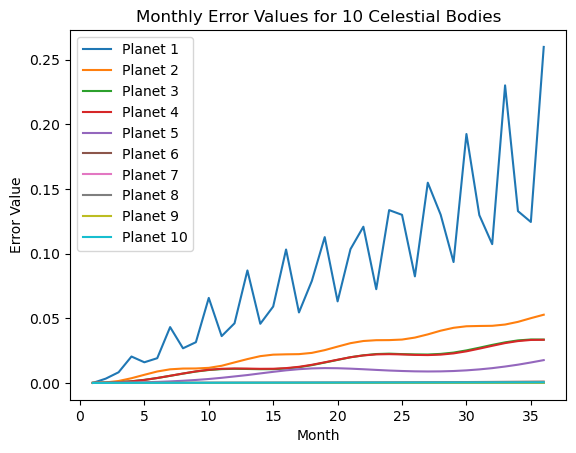

In [4]:
monthDayDict = {
    1:31,2:28,3:31,4:30,5:31,6:30,7:31,8:31,9:30,10:31,11:30,12:31
}

#redefine these to reset them
calculatedPositions = []
positions = np.zeros((numBodies, 3))
velocities = np.zeros((numBodies, 3))
masses = np.zeros(numBodies)
sunMass = 1.988e+30
masses[0] = sunMass

# Use API to get initial body data
# start at 1 to skip the sun cause its weird
calculatedPositions.append([[0,0,0]])
for i in range(1,numBodies):
    bodyData = getEphemeris(bodyIDs[i], '2004-03-10', '2004-03-11')
    positions[i] = bodyData["position"]
    velocities[i] = bodyData["velocity"]
    masses[i] = bodyData["mass"]
    calculatedPositions.append([bodyData["position"]])
    
realPositions = []
startingMonth = 3
startingDay = 10
startingYear = 2004
numMonths = 36 #IMPORTANT NOTE, this code does not factor in leap years, so to be completely accurate
#              You must make sure your date range does not include a february 29th
apiFileName = "realPositions" + str(startingMonth)+str(startingDay)+str(startingYear)+str(numBodies)+str(numMonths)+".npy"
# read real position data from existing file if it exists
if os.path.exists(apiFileName):
    print("Loading from file")
    realPositions = np.load(apiFileName)
# Else, Use API to get body data over time
# start at 1 to skip the sun cause its weird
# also NOTE I know there is a way to setup the API call to give it a time range with a time step,
# so could say give me every months data for a year. but for now its faster to just do it this rough way
else:
    # sun is weird
    # realPositions.append([])
    # for _ in range(numMonths):
    #     realPositions[0].append([0,0,0])
    print("Calling API")
    for i in range(1,numBodies):
        realPositions.append([])
        month=startingMonth
        year=startingYear
        for j in range(numMonths):
            monthString = '0'+str(month) if month%12+1 < 10 else str(month)
            bodyData = getEphemeris(bodyIDs[i], str(year)+'-'+monthString+'-10', str(year)+'-'+monthString+'-11')
            realPositions[i-1].append(bodyData["position"])
            month+=1
            if month==13:
                year+=1
                month=1
    realPositions = np.array(realPositions)
    np.save(apiFileName, realPositions)

deltaT=600 # in seconds
simFileName = "calculatedPositions" + str(startingMonth)+str(startingDay)+str(startingYear)+str(numBodies)+str(numMonths)+str(deltaT)+".npy"
# read real position data from existing file if it exists
if os.path.exists(simFileName):
    print("Loading from file")
    calculatedPositions = np.load(simFileName)
# Else, Use API to get body data over time
# start at 1 to skip the sun cause its weird
# also NOTE I know there is a way to setup the API call to give it a time range with a time step,
# so could say give me every months data for a year. but for now its faster to just do it this rough way
else:
    currentMonth = startingMonth
    currentDay = startingDay
    print("running simulation")
    for i in range(1,int((numMonths/12)*365*24*60*60/deltaT)): # seconds in number of years divided by how many seconds deltaT is
        if i%(int(24*60*60 / deltaT))==0: #every day:, seconds in a day divided by how many seconds deltaT is
            # print("Month: " + str(currentMonth) + " | Day: " + str(currentDay))
            currentDay+=1
            if currentDay > monthDayDict[currentMonth]:
                currentDay=1
                currentMonth+=1
                if currentMonth == 13:
                    currentMonth = 1
            if currentDay == startingDay: #every month:
                for j in range(numBodies):
                    calculatedPositions[j].append(positions[j])
                print("ran one month")

        positions, velocities = update(numBodies, positions, velocities, masses, deltaT)
    calculatedPositions = np.array(calculatedPositions)
    print("finished simulation")
    np.save(simFileName, calculatedPositions)



# the real postions are always relative to the sun center cause thats how nasa database works
# so to be truly accurate, we should subtract the suns position from the bodies before comparing
errors = np.linalg.norm(realPositions-(calculatedPositions[1:]-calculatedPositions[0]),axis=2) / np.linalg.norm(realPositions,axis=2)
# print(errors)

#matplotlib time
# Define months for x-axis labels
months = np.arange(1, numMonths+1)

# Plot each planet's error values (each row in the error_values array)
for i in range(errors.shape[0]):
    pyplt.plot(months, errors[i], label=f'Planet {i+1}')

# Add labels and title
pyplt.xlabel('Month')
pyplt.ylabel('Error Value')
pyplt.title('Monthly Error Values for ' + str(errors.shape[0]) + ' Celestial Bodies')

# Add a legend to identify each line
pyplt.legend()

# Display the plot
pyplt.show()

As you can see, the error slowly accumulates over time, but even after running the simulation for 3 Earth years in simulation time, all the bodies except Mercury (Which orbits way faster so makes sense for their to be more error), have errors below 10%, which I think is quite exceptional!

##### Average Year Length
I was having issues with my position verification being super inaccurate (errors upwards of 500% after a year) so Dr. Bocan suggested trying to verify with average year length instead, since my visual simulation looked accurate. I started to do average year length verification, but then it led me into finding the bugs in my code that caused the high errors in the position verification.

After finding those bugs, the position verification was getting errors around 25-75% for mercury, and consistently below 10% for every other planet, after 3 years of running. So with that being much much better, I decided to stop continuing work on average year length analysis because I find the position analysis to be much better.

But anyways, the code I had started work on to verify average year length is below. You can set the time for the simulation to run with `numEarthYears` and you can set which body to check the year length for with `bodyID`, (Sun=10, Mercury=199, Venus=299, etc). Then the code spits out a list with the time it took, in Earth days, for the body in question to orbit the sun each time. So for example Mercury has an average year of 88 Earth days, so if you set `bodyID=199` and `numEarthYears=1`, you should see it output a list of length floor(365/88), and with each entry being around 88 days

Source for average year lengths for different bodies: [I just googled it and looked at the pop-up result](google.com)

In [58]:
#redefine these to reset them
calculatedPositions = []
positions = np.zeros((numBodies, 3))
velocities = np.zeros((numBodies, 3))
masses = np.zeros(numBodies)
sunMass = 1.988e+30
masses[0] = sunMass

# Use API to get initial body data
# start at 1 to skip the sun cause its weird
for i in range(1,numBodies):
    bodyData = getEphemeris(bodyIDs[i], '2004-03-10', '2004-03-11')
    positions[i] = bodyData["position"]
    velocities[i] = bodyData["velocity"]
    masses[i] = bodyData["mass"]
    calculatedPositions.append([bodyData["position"]])
    
deltaT=3600 # in seconds
prevError = 0
decreasingError = False
prevDecreasing = False
numEarthYears=1
bodyID=199
idx=bodyIDs.index(bodyID)
daysInYears = []
print("starting simulation")
for i in range(1,int(numEarthYears*365*24*60*60/deltaT)): # seconds in a year divided by how many seconds deltaT is  
    positions, velocities = update(numBodies, positions, velocities, masses, deltaT)
    positionError = np.linalg.norm(positions[idx]-positions[0]-calculatedPositions[idx-1][0])/np.linalg.norm(calculatedPositions[idx-1][0])
    # if i % int(7*24*60*60/deltaT)==0: #seconds in a week divided by deltaT
    #     print("day " + str(i/(24*60*60/deltaT)))
        
    decreasingError = positionError < prevError
    if (not decreasingError) and prevDecreasing:
        daysInYears.append(i/(24*60*60/deltaT))
        print("one body year complete")
    prevError = positionError
    prevDecreasing = decreasingError
print("finished simulation")
for i in reversed(range(1,len(daysInYears))):
    daysInYears[i] -= daysInYears[i-1]
print(daysInYears)

starting simulation
one body year complete
one body year complete
one body year complete
one body year complete
one body year complete
finished simulation
[366.0, 365.83333333333337, 365.9999999999999, 365.8333333333335, 365.83333333333326]


#### deltaT Analysis
Lastly, in the saved files I have, I ran a bunch of simulations with all of the settings the same, except deltaT. So now we can plot error after 3 Earth years vs deltaT for each planet.

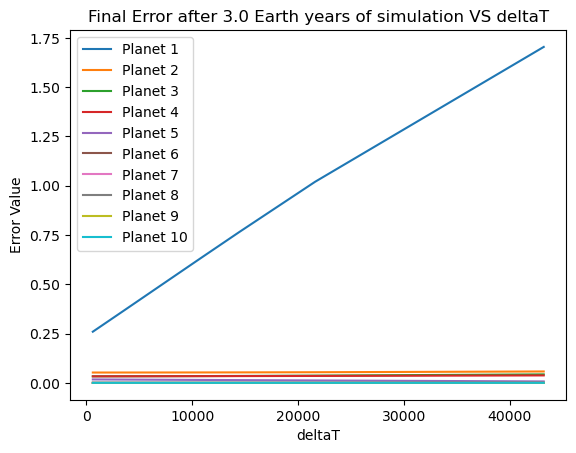

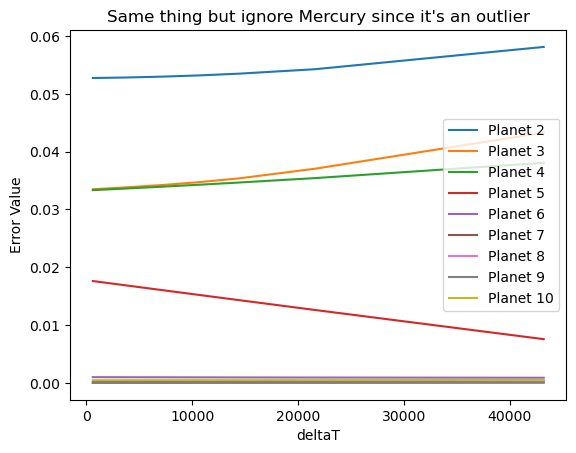

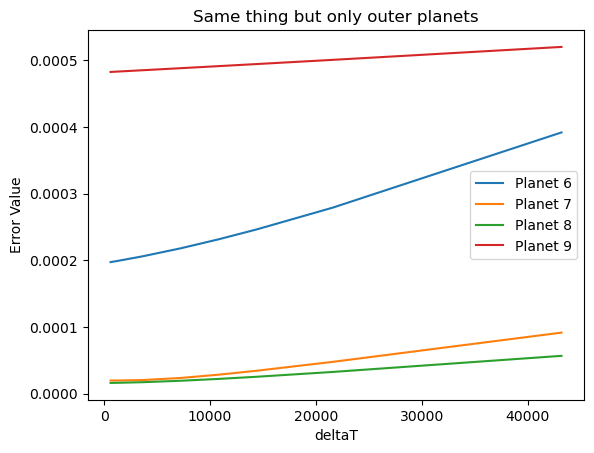

In [5]:
realPositions = []
calculatedPositions = []
startingMonth = 3
startingDay = 10
startingYear = 2004
numMonths = 36 #IMPORTANT NOTE, this code does not factor in leap years

finalErrors = []
deltaTValues = [600, 1200, 3600, 3600*2, 3600*3, 3600*4, 3600*6, 3600*12]

for i in range(len(deltaTValues)):
    finalErrors.append([])
    apiFileName = "realPositions" + str(startingMonth)+str(startingDay)+str(startingYear)+str(numBodies)+str(numMonths)+".npy"
    simFileName = "calculatedPositions" + str(startingMonth)+str(startingDay)+str(startingYear)+str(numBodies)+str(numMonths)+str(deltaTValues[i])+".npy"
    if os.path.exists(simFileName) and os.path.exists(apiFileName):
        realPositions = np.load(apiFileName)
        calculatedPositions = np.load(simFileName)
        errors = np.linalg.norm(realPositions-(calculatedPositions[1:]-calculatedPositions[0]),axis=2) / np.linalg.norm(realPositions,axis=2)
        for j in range(errors.shape[0]):
            finalError = errors[j][-1]
            finalErrors[i].append(finalError)
    else:
        print("Missing file, failed")
finalErrors = np.array(finalErrors)
finalErrors = finalErrors.T

#matplotlib time
# Plot each planet's error values
for i in range(finalErrors.shape[0]):
    pyplt.plot(deltaTValues, finalErrors[i], label=f'Planet {i+1}')

# Add labels and title
pyplt.xlabel('deltaT')
pyplt.ylabel('Error Value')
pyplt.title('Final Error after ' + str(numMonths/12) + ' Earth years of simulation VS deltaT')

# Add a legend to identify each line
pyplt.legend()

# Display the plot
pyplt.show()


# IGNORE MERCURY
finalErrors = finalErrors[1:]
for i in range(finalErrors.shape[0]):
    pyplt.plot(deltaTValues, finalErrors[i], label=f'Planet {i+2}')

# Add labels and title
pyplt.xlabel('deltaT')
pyplt.ylabel('Error Value')
pyplt.title('Same thing but ignore Mercury since it\'s an outlier')

# Add a legend to identify each line
pyplt.legend()

# Display the plot
pyplt.show()

# Outer planets only
finalErrors = finalErrors[5:]
for i in range(finalErrors.shape[0]):
    pyplt.plot(deltaTValues, finalErrors[i], label=f'Planet {i+6}')

# Add labels and title
pyplt.xlabel('deltaT')
pyplt.ylabel('Error Value')
pyplt.title('Same thing but only outer planets')

# Add a legend to identify each line
pyplt.legend()

# Display the plot
pyplt.show()

Other than Mars, which for some odd reason actually is more accurate with higher deltaT, all the bodies behave as expected, and their error increases as deltaT increases. This is the expected behavior since higher deltaT inherently should increase inaccuracy.

Because of Mercuries much higher speed compared to the rest of the planets, it's error increases with deltaT at a higher rate than the rest. And then same thing with the inner planets vs the outer planets, the outer planets error increas much more slowly since they move much more slowly.

## Conclusion
This was a really fun and fulfilling project! I'm happy I got everything to work in the end and the verification values to come out well. I had some very difficult to catch bugs that were causing my visual simulation to look correct, but the verification values to be way off. But that's behind me now.

My biggest gripe with this project (which is no fault of Dr. Bocan at all), is the inconsistencies of the NASA database. Basically every third body in the database would format it's mass and radius data in a different way, making it near impossible to automatically scrape the database for those values (without using a natural language processing model).  
A goal of mine was to include every planet + EVERY moon (Yes, all 60+ of Jupiters) in the simulation, but the database issues made this infeasible. The ephemeris data however, was actually consistently formatted at least, so maybe I couldve manually entered mass and radii data for like 120 different bodies, and then scrapted the ephemeris data, so that way I could have all the moons etc. But that sounds like a major pain. Maybe if I have free time after this is due I'll do that.

I also had issue with getting the scaling to look good once I started including Pluto and the outer planets. I'm pretty happy with my solution I came up with of just arbitrarily setting a radius (and radius of orbit) for each planet, then setting its position by using its real unit vector relative to the sun multiplied by its arbitrary orbit radius. But it could definitely be improved.

Anyways, have a good day!